**2020/21**

# Clustering
This lecture is about 

**Disclaimer**: this notebook is far from complete! The all ideia is to provide a glimpse into k-means clustering and some visualization.

In [1]:
# some imports 

import os # OS e.g directory structure
import numpy as np # linear algebra
import scipy as sc  # scientific computing
import pandas as pd # data processing, file I/O
import seaborn as sns  # visualization
import matplotlib.pyplot as plt # visualization
import warnings
warnings.filterwarnings("ignore")

# Exercise

This exercise is about 
    

## Context


## Data



**Column Description**


|Column     | Type       | Description |
|--------  |---------  |--------- |
| **class** |  |  |

    

## Useful functions
Some functions we may use

In [2]:
# see https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

def ScatterPlot(df, width, height):
    # generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df, dtype=bool))
    # set up the matplotlib figure
    f, ax = plt.subplots(figsize=(width, height))
    # generate a custom diverging colormap
    #cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    #cmap="YlGnBu"
    # see https://matplotlib.org/stable/tutorials/colors/colormaps.html
    cmap="Wistia"
    # others like plasma, hot, seismic, etc
   
    sns.heatmap(df, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, ax=ax,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [3]:
sns.set_theme(style="white")

## Loading the dataset

In [ ]:
! pwd 
! ls -la
! head -n 3 iris.csv
! tail -n 3 iris.csv

In [4]:
# some Spark related imports

import sys

from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [5]:
# read the dataset 

df = spark.read.csv("iris.csv", header="true", inferSchema="true")

## Exploratory data analysis

Let us get some insight from data

In [6]:
# check the data, both schema and some content

df.printSchema()
cols = df.columns
df.count()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- class: string (nullable = true)



150

### Data cleasing/preparation

In [7]:
# checking nulls
# It seems there are no nulls anyway

df.dropna().count()


150

In [8]:
# columns

cols_features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]


In [9]:
# As for completing missing numeric values, we can use Inputer 
# either using the mean or the median of the columns in which the missing 
# values are located. 

# See pyspark.ml.feature.Imputer

# leave it for now

### Basic statistics
Correlations and summary statistics about the data


In [10]:
# use of Correlation from pyspark.ml.stat

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Correlation requires vectors so prior we convert to vector column

vector_col = "corr_features"
assembler = VectorAssembler(inputCols=cols_features, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

# get correlation matrix

matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
corrmatrix

[[1.0, -0.10936924995064934, 0.8717541573048722, 0.8179536333691638],
 [-0.10936924995064934, 1.0, -0.4205160964011551, -0.3565440896138061],
 [0.8717541573048722, -0.4205160964011551, 1.0, 0.9627570970509672],
 [0.8179536333691638, -0.3565440896138061, 0.9627570970509672, 1.0]]

In [11]:
# Python DataFrame for visualization

df_plot = pd.DataFrame(data = corrmatrix, index=cols_features, columns=cols_features)
df_plot

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


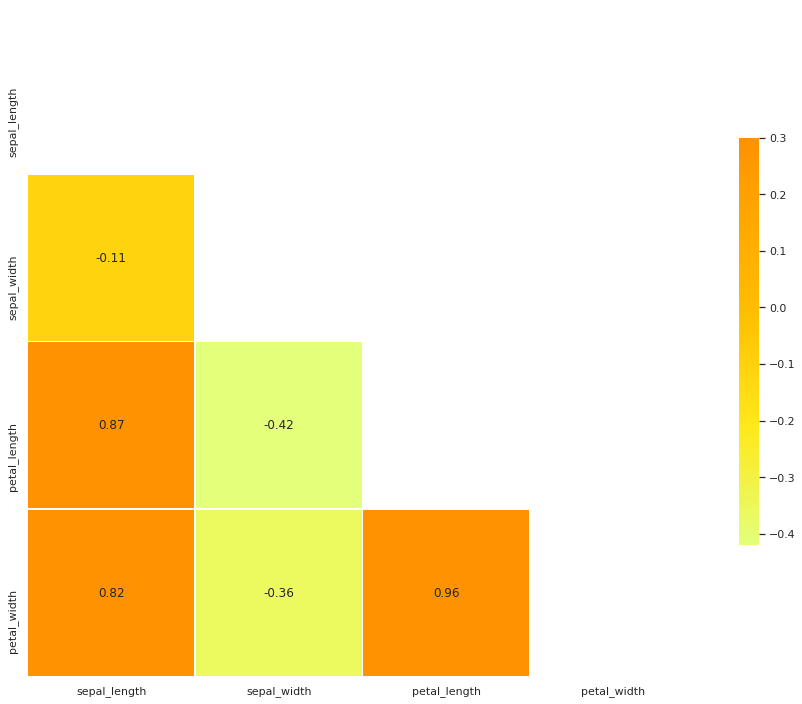

In [12]:
ScatterPlot(df_plot, 15, 15)

In [13]:
# summary of basic statistics with describe()

df.describe(cols_features).show()

+-------+------------------+-------------------+------------------+------------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|
+-------+------------------+-------------------+------------------+------------------+
|  count|               150|                150|               150|               150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|
|    min|               4.3|                2.0|               1.0|               0.1|
|    max|               7.9|                4.4|               6.9|               2.5|
+-------+------------------+-------------------+------------------+------------------+



In [50]:
# clear some objects we no longer need

# del 

In [24]:
# recall our dataset
df.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

## Clustering


In [25]:
# some pyspark imports

from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator


### Feature engineering
It is time to decide which features to use in the clustering process

In [26]:
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [27]:
# columns we will hold: cols and features

# features = ["sepal_length", "sepal_width"]
features = ["sepal_length", "sepal_width", 'petal_length', 'petal_width']


In [28]:
# feature engineering

# we have to put all input features into a single vector, DenseVector,

vec_assembler = VectorAssembler(inputCols=features, outputCol="features")
vec_df = vec_assembler.transform(df)

In [29]:
vec_df.show()

+------------+-----------+------------+-----------+-----------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|      class|         features|
+------------+-----------+------------+-----------+-----------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|[4.4,2.9,1.4,0.2]|
|         4.9|  

### Number of clusters
Since k-means needs the k to be set in advance, let us figure out an optimal number.
But to do so, we are going to use a even smaller part of the dataset

In [30]:
max_tiny = 100
vec_dftiny = vec_assembler.transform(df.limit(max_tiny))

In [31]:
vec_dftiny.show()

+------------+-----------+------------+-----------+-----------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|      class|         features|
+------------+-----------+------------+-----------+-----------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|[4.4,2.9,1.4,0.2]|
|         4.9|  

In [34]:
# the k-means algorithm

evaluator = ClusteringEvaluator()

silhouettes = []
cluster_centres = []
for k in range(2,20):
    
    # trains a k-means model
    kmeans = KMeans(k=k, seed=221, maxIter=20)
    
    # fit the model
    model = kmeans.fit(vec_df)
    
    # use the model to transform the DataFrame by adding cluster predictions
    predictions = model.transform(vec_dftiny)
    

    # get the clusterCenters from the model
    cluster_centres.append(model.clusterCenters())
    
    # evaluate clustering by computing silhouette score
    silhouettes.append(evaluator.evaluate(predictions))


In [35]:
# show cluster centres and silhouette scores

print("Cluster centres: ")
for centroid in cluster_centres:
    print(centroid)
print("Silhouettes with squared euclidean distances: ")
print(silhouettes)

Cluster centres: 
[array([5.00566038, 3.36037736, 1.56226415, 0.28867925]), array([6.30103093, 2.88659794, 4.95876289, 1.69587629])]
[array([5.006, 3.418, 1.464, 0.244]), array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097]), array([6.85      , 3.07368421, 5.74210526, 2.07105263])]
[array([4.81818182, 3.22121212, 1.43636364, 0.22727273]), array([6.85      , 3.07368421, 5.74210526, 2.07105263]), array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097]), array([5.37058824, 3.8       , 1.51764706, 0.27647059])]
[array([4.81818182, 3.22121212, 1.43636364, 0.22727273]), array([6.9125  , 3.1     , 5.846875, 2.13125 ]), array([6.2525, 2.855 , 4.815 , 1.625 ]), array([5.37058824, 3.8       , 1.51764706, 0.27647059]), array([5.53214286, 2.63571429, 3.96071429, 1.22857143])]
[array([4.81818182, 3.22121212, 1.43636364, 0.22727273]), array([6.608, 3.064, 5.552, 2.128]), array([6.1975, 2.8525, 4.755 , 1.585 ]), array([5.508, 2.6  , 3.908, 1.204]), array([5.37058824, 3.8       , 1.51764706, 0.276470

Text(0, 0.5, 'silhouette score')

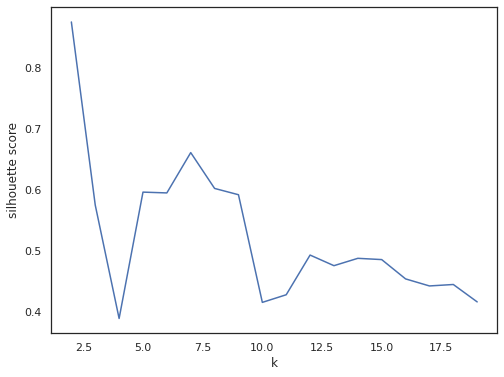

In [36]:
# visualize the options for k

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),silhouettes[0:20])
ax.set_xlabel('k')
ax.set_ylabel('silhouette score')

### Model setting


In [51]:
# setting the optimal k, based on the picture above

optimal_k = 3

In [52]:
# the k-means algorithm but now applied to the complete dataset
    
# trains a k-means model
kmeans = KMeans(k=optimal_k, seed=221, maxIter=20)

# fit the model
model = kmeans.fit(vec_df)

# use the model to transform the DataFrame by adding cluster predictions
df_predictions = model.transform(vec_df)
    
# get the clusterCenters from the model
cluster_centres = model.clusterCenters()

# evaluate clustering by computing silhouette score
silhouette = evaluator.evaluate(predictions)


In [53]:
# predictions about where each datum belongs to (which cluster)

predictions.show()

+------------+-----------+------------+-----------+-----------+-----------------+----------+
|sepal_length|sepal_width|petal_length|petal_width|      class|         features|prediction|
+------------+-----------+------------+-----------+-----------+-----------------+----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|        13|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|         0|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|         0|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|         0|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|        13|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|        17|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|         0|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.

In [54]:
# show cluster centres and silhouette score

print("Cluster centres: ")
print(cluster_centres)
print("Silhouette with squared euclidean distances: ")
print(silhouette)

Cluster centres: 
[array([5.006, 3.418, 1.464, 0.244]), array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097]), array([6.85      , 3.07368421, 5.74210526, 2.07105263])]
Silhouette with squared euclidean distances: 
0.41630359018309143


## Visualization

Let us visualize how clustering has performed against the true labels of the data and the clusters that were built.

Notice that, despite k-means does not use true labels while training, we can use them to figure how it performed. 


In [55]:
df_plot = predictions.toPandas().set_index('class')
df_plot

,sepal_length,sepal_width,petal_length,petal_width,features,prediction
class,,,,,,
Iris-setosa,5.1,3.5,1.4,0.2,"[5.1, 3.5, 1.4, 0.2]",13
Iris-setosa,4.9,3.0,1.4,0.2,"[4.9, 3.0, 1.4, 0.2]",0
Iris-setosa,4.7,3.2,1.3,0.2,"[4.7, 3.2, 1.3, 0.2]",0
Iris-setosa,4.6,3.1,1.5,0.2,"[4.6, 3.1, 1.5, 0.2]",0
Iris-setosa,5.0,3.6,1.4,0.2,"[5.0, 3.6, 1.4, 0.2]",13
Iris-setosa,5.4,3.9,1.7,0.4,"[5.4, 3.9, 1.7, 0.4]",17
Iris-setosa,4.6,3.4,1.4,0.3,"[4.6, 3.4, 1.4, 0.3]",0
Iris-setosa,5.0,3.4,1.5,0.2,"[5.0, 3.4, 1.5, 0.2]",13
Iris-setosa,4.4,2.9,1.4,0.2,"[4.4, 2.9, 1.4, 0.2]",0


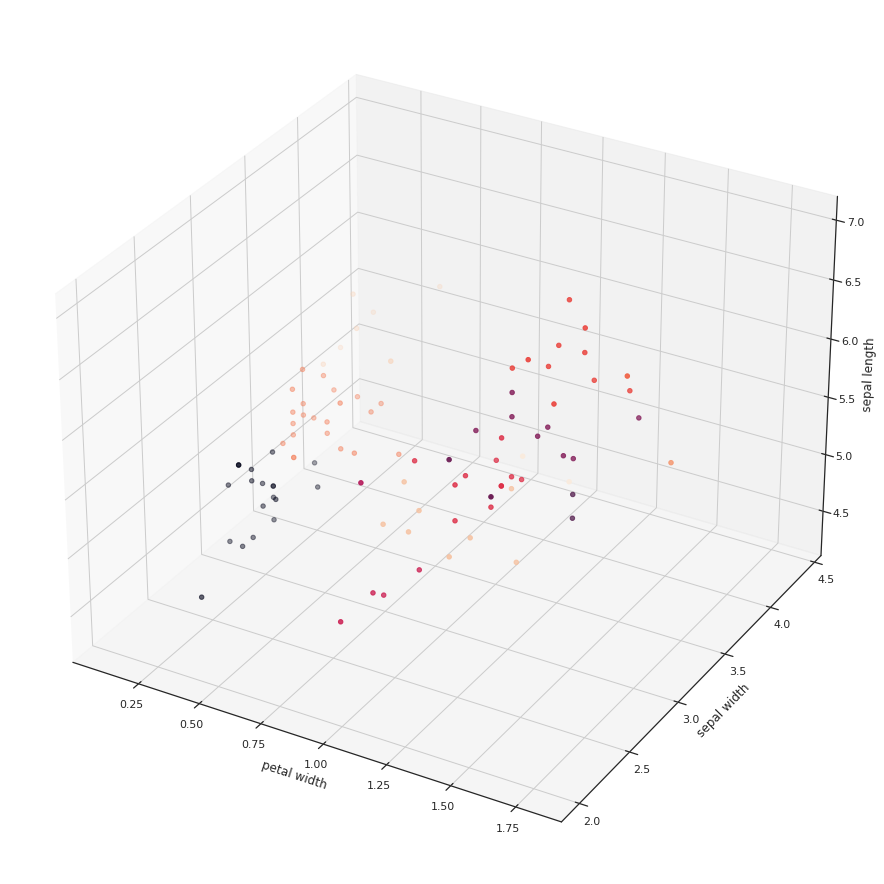

In [65]:
# some visualization ... just 3 features

plot3D = plt.figure(figsize=(18,16)).gca(projection='3d')
plot3D.scatter(df_plot.petal_width, df_plot.sepal_width, df_plot.sepal_length, c=df_plot.prediction)
plot3D.set_xlabel('petal width')
plot3D.set_ylabel('sepal width')
plot3D.set_zlabel('sepal length')

# todo: add centroids with colour of the cluster of concern

plt.show()

In [57]:
# to be continued, but considering prediction vs class 


In [62]:
df_plot2 = predictions.select(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class', 'prediction']).toPandas()
df_plot2

,sepal_length,sepal_width,petal_length,petal_width,class,prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,13
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,13
5,5.4,3.9,1.7,0.4,Iris-setosa,17
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,13
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


<AxesSubplot:>

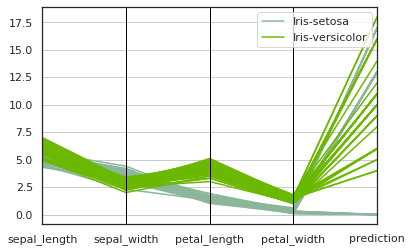

In [63]:
# a better visualization is to use parallel coordinates as we have many features

pd.plotting.parallel_coordinates(df_plot2, 'class')

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='prediction', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='prediction', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='prediction', ylabel='petal_lengt

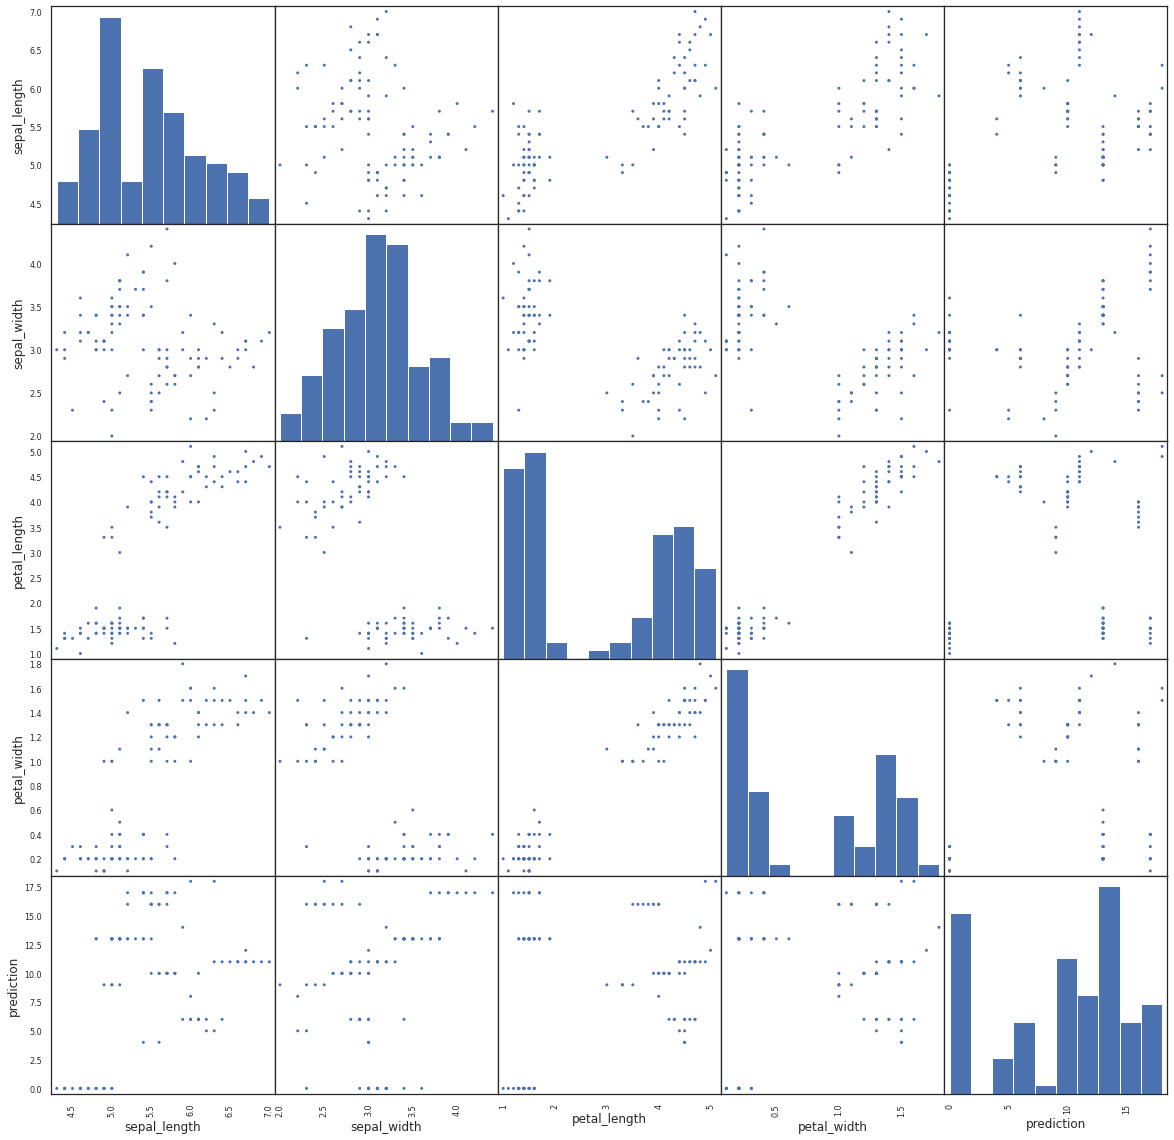

In [64]:
# ... and another way
pd.plotting.scatter_matrix(df_plot2, alpha=1.0, figsize=(20,20))